# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>
## <center>__Modelagem de Tópicos com NMF e SVD__</center>
#### <center>__ALUNO: Alexandre dos Santos Oliveira__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

Nesse domínio, um tópico refere-se a uma coleção de termos frequentemente usados em combinação com documentos do mesmo tema. Portanto, os principais resultados da modelagem de tópicos são: uma lista de tópicos e a lista de documentos que estão correlacionados a cada tópico.

A modelagem de tópicos tem várias aplicações práticas em PNL, como por exemplo:

Decidindo o assunto da conversa para Chatbots.
Detectar opiniões de usuários semelhantes para um determinado tópico.
Inferir tópicos ocultos em um conjunto de documentos.
Agrupando feedback do cliente.

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

A modelagem de tópicos é uma abordagem de aprendizagem não supervisionada para agrupamento de documentos com base nos tópicos de seu conteúdo. Criaremos um modelo usando uma técnica de modelagem de tópicos chamada Fatoração de Matriz Não Negativa (NMF) para inferir os principais temas existentes em um conjunto de dados de avaliações de hotéis, analisar o quão precisa é essa classificação em todos os documentos e prever o tópico de um novo documento com nosso modelo treinado.

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Usaremos duas das principais abordagens da modelagem de tópicos, que foram faladas anteriormente, Decomposição de Valor Singular (SVD) e Fatoração de Matriz Não Negativa (NMF).
TF-IDF (Frequência de Documento Inverso de Frequência de Tópico)
SGD (Descida do Gradiente Estocástico)
PyTorch
Autograd

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [125]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [127]:
%matplotlib inline
np.set_printoptions(suppress=True)

Newsgroups é um conjunto de dados que consistem em grupos de discussão na Usenet e inclui 18.000 postagens de grupos de notícias com 20 tópicos.
Para configurar os dados, iremos utilizar o 'Scikit Learn'.

In [129]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [131]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [133]:
np . array ( newsgroups_train . target_names )[ newsgroups_train . target [: 3 ]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [135]:
from sklearn.feature_extraction.text  import  CountVectorizer ,  TfidfVectorizer

Ajustando o conjunto de dados em uma variável e retirando as stop-words.

In [137]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [139]:
vocab = np.array(vectorizer.get_feature_names())

In [141]:
vocab.shape

(26576,)

In [143]:
## Visualizando
vocab[6000:6020]

array(['cleveland', 'clever', 'cleverer', 'cleverly', 'cli',
       'cliberbuiten', 'clibstatus', 'clibsucces', 'cliche', 'click',
       'clicking', 'clicks', 'client', 'clients', 'cliff', 'climate',
       'climatic', 'climatologist', 'climbed', 'clime'], dtype='<U80')

Aplicando o conceito de SVD

In [ ]:
## análise do tempo
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

In [ ]:
print(U.shape, s.shape, Vh.shape)

In [ ]:
## Nossa função respónsavel por mostrar os tópicos modelados
num_top_words=10

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [ ]:
show_topics(Vh[:10])

Aplicando o conceito de NMF

In [155]:
m,n=vectors.shape
d=5  # num topics

In [156]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\elxan\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [157]:
show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

Aplicando TF-IDF

In [158]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [159]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

C:\Users\elxan\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [160]:
show_topics(H1)

['people don think just like objective say morality know moral',
 'graphics thanks files image file program windows know format ftp',
 'space nasa launch shuttle orbit moon lunar earth station data',
 'ico bobbe tek beauchaine bronx manhattan sank queens vice blew',
 'god jesus bible believe christian atheism does belief faith christians']

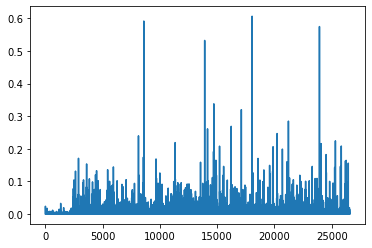

In [161]:
plt.plot(clf.components_[0])

In [162]:
clf.reconstruction_err_

43.71292605795281

Aplicando SGD com o NMF

In [163]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [164]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\elxan\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [165]:
show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

In [166]:
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

In [167]:
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

In [168]:
def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [169]:
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [170]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [171]:
report(vectors_tfidf, W, H)

44.42525713041379 1.2423873984267564e-06 3.170727646346859e-08 0 0


In [172]:
upd(vectors_tfidf,W,H,lr)

In [173]:
report(vectors_tfidf, W, H)

44.41764679607786 -0.0006372029626913623 -7.026787352439305e-05 128 292


In [174]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.411861705740755 -0.0006930881521522881 -6.081737447115756e-05 145 273
44.374391259489855 -0.000308834622106203 -6.201634855749347e-05 46 536
44.34538679846034 -0.00019288963175843497 -6.765074689636629e-05 25 991
44.313097084840514 -0.0001632898709066142 -8.100502933344807e-05 39 1528
44.27768185859162 -0.00010897174766033 -0.00012575147276250022 39 2242


In [175]:
show_topics(H)

['god space does like don know people just think time',
 'people god know don just space like think does good',
 'space god don just people know think does like say',
 'space don people god think just like know does good',
 'don space people god think like just know ve does']

In [176]:
from scipy import linalg

In [177]:
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

Construído SVD randomizado para aplicação

In [178]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [179]:
u, s, v = randomized_svd(vectors, 5)

In [180]:
%time u, s, v = randomized_svd(vectors, 5)

Wall time: 15.2 s


In [181]:
# dividindo em 5 listas
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [182]:
# os tópicos relacionnados dentro da cada lista
show_topics(v)

['jpeg image edu file graphics images gif data pub ftp',
 'edu graphics data space pub mail 128 3d ray nasa',
 'graphics edu pub mail 128 3d ray ftp send image',
 'jesus god matthew people atheists atheism does graphics religious said',
 'image data processing analysis software available tools display tool user']

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [217]:
df = pd.read_csv('Hotel_Reviews.csv')
df["Review"] = df["Negative_Review"] + " " + df["Positive_Review"]
df 

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,no trolly or staff to help you take the lugga...
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,The hotel looks like 3 but surely not 4 Bre...
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,The ac was useless It was a hot week in vienn...
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,No Negative The rooms are enormous and really...


In [218]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df).todense() # (documents, vocab)
vectors.shape

(18, 18)

In [219]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 0 ns


In [220]:
vocab = np.array(vectorizer.get_feature_names())

In [221]:
vocab.shape

(18,)

In [222]:
vocab[1000:1030]

array([], dtype='<U42')

In [223]:
show_topics(Vh[:10])

['total_number_of_reviews_reviewer_has_given total_number_of_reviews average_score days_since_review hotel_address hotel_name lat lng negative_review positive_review',
 'total_number_of_reviews_reviewer_has_given total_number_of_reviews days_since_review hotel_address hotel_name lat lng negative_review positive_review review',
 'total_number_of_reviews_reviewer_has_given total_number_of_reviews average_score hotel_address hotel_name lat lng negative_review positive_review review',
 'hotel_address total_number_of_reviews_reviewer_has_given total_number_of_reviews average_score days_since_review hotel_name lat lng negative_review positive_review',
 'hotel_name total_number_of_reviews_reviewer_has_given total_number_of_reviews average_score days_since_review hotel_address lat lng negative_review positive_review',
 'total_number_of_reviews_reviewer_has_given total_number_of_reviews average_score days_since_review hotel_address hotel_name lng negative_review positive_review review',
 'total

Usando o método NMF

In [228]:
m,n=vectors.shape
d=5 

In [229]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\elxan\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [230]:
show_topics(H1)

['review total_number_of_reviews reviewer_score lat hotel_name total_number_of_reviews_reviewer_has_given lng average_score days_since_review hotel_address',
 'average_score additional_number_of_scoring review_total_negative_word_counts total_number_of_reviews_reviewer_has_given negative_review reviewer_nationality review_total_positive_word_counts reviewer_score review_date review',
 'lng review_total_positive_word_counts hotel_address hotel_name additional_number_of_scoring reviewer_nationality negative_review average_score days_since_review lat',
 'reviewer_nationality tags days_since_review positive_review negative_review total_number_of_reviews lng average_score hotel_address hotel_name',
 'review_date reviewer_score days_since_review hotel_address total_number_of_reviews_reviewer_has_given negative_review average_score hotel_name lat lng']

Com TF-IDF

In [231]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(corpo_texto) # (documents, vocab)

In [232]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

C:\Users\elxan\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [233]:
show_topics(H1)

['days_since_review positive_review total_number_of_reviews review review_total_positive_word_counts lat review_date reviewer_nationality review_total_negative_word_counts tags',
 'lng review_total_positive_word_counts hotel_name average_score reviewer_score total_number_of_reviews days_since_review hotel_address lat positive_review',
 'review_total_negative_word_counts hotel_name lat average_score negative_review total_number_of_reviews days_since_review hotel_address lng positive_review',
 'reviewer_nationality hotel_address average_score tags additional_number_of_scoring total_number_of_reviews review_date review review_total_negative_word_counts negative_review',
 'reviewer_score negative_review review_date tags total_number_of_reviews lat average_score days_since_review hotel_address hotel_name']

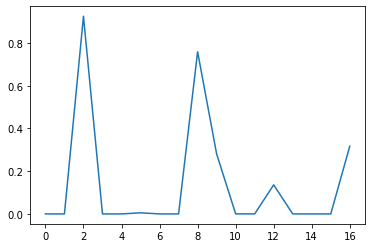

In [234]:
plt.plot(clf.components_[0])

In [235]:
clf.reconstruction_err_

3.4641026107781583

Usando o método SGD com NMF

In [236]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [237]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\elxan\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [238]:
show_topics(H1)

['review total_number_of_reviews reviewer_score lat hotel_name total_number_of_reviews_reviewer_has_given lng average_score days_since_review hotel_address',
 'average_score additional_number_of_scoring review_total_negative_word_counts total_number_of_reviews_reviewer_has_given negative_review reviewer_nationality review_total_positive_word_counts reviewer_score review_date review',
 'lng review_total_positive_word_counts hotel_address hotel_name additional_number_of_scoring reviewer_nationality negative_review average_score days_since_review lat',
 'reviewer_nationality tags days_since_review positive_review negative_review total_number_of_reviews lng average_score hotel_address hotel_name',
 'review_date reviewer_score days_since_review hotel_address total_number_of_reviews_reviewer_has_given negative_review average_score hotel_name lat lng']

In [239]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [241]:
report(vectors_tfidf, W, H)

4.121713505742294 0.0002139764735835484 0.0009650980567526013 0 0


In [242]:
upd(vectors_tfidf,W,H,lr)

In [243]:
report(vectors_tfidf, W, H)

4.121672305858392 0.0002435566114608804 0.0010672918354180977 0 0


In [244]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

4.121630558616525 0.0002731448018988481 0.0011695661061952426 0 0
4.1211793838081165 0.0005700298462260006 0.0018387625656764732 0 0
4.120654625559726 0.0008704760435963042 0.0020911381757998497 0 0
4.120036694367272 0.001176864143160377 0.0023616203185201088 0 0
4.119302925502196 0.0014914193548601652 0.002652035302471009 0 0


In [245]:
show_topics(H)

['hotel_name review_date reviewer_nationality reviewer_score negative_review hotel_address average_score review review_total_positive_word_counts days_since_review',
 'negative_review review reviewer_score hotel_address additional_number_of_scoring average_score review_date positive_review tags review_total_positive_word_counts',
 'review_total_positive_word_counts review_date review_total_negative_word_counts negative_review hotel_address reviewer_score review hotel_name days_since_review tags',
 'review days_since_review hotel_name hotel_address reviewer_nationality total_number_of_reviews reviewer_score review_date lat additional_number_of_scoring',
 'review_date days_since_review review tags lng hotel_name review_total_negative_word_counts reviewer_score positive_review average_score']

Com o SVD randomizado

In [246]:
u, s, v = randomized_svd(vectors, 5)

In [247]:
%time u, s, v = randomized_svd(vectors, 5)

Wall time: 4 ms


In [248]:
u.shape, s.shape, v.shape

((18, 5), (5,), (5, 18))

In [249]:
show_topics(v)

['hotel_address tags review_date negative_review days_since_review review_total_positive_word_counts reviewer_score lat reviewer_nationality additional_number_of_scoring',
 'lng days_since_review hotel_address tags positive_review total_number_of_reviews negative_review review_date review_total_positive_word_counts total_number_of_reviews_reviewer_has_given',
 'total_number_of_reviews_reviewer_has_given total_number_of_reviews hotel_name additional_number_of_scoring tags hotel_address lat review_total_positive_word_counts lng average_score',
 'total_number_of_reviews negative_review review_total_negative_word_counts hotel_name positive_review reviewer_nationality hotel_address days_since_review lng additional_number_of_scoring',
 'reviewer_nationality hotel_name hotel_address average_score positive_review tags total_number_of_reviews_reviewer_has_given negative_review additional_number_of_scoring days_since_review']

Após as análises feitas podemos concluir o nosso caso de teste, com os resultados vimos que o SVD randomizado apresenta melhores desempenhos, com isso fica claro que é um melhor método para essas determinads situações.